In [1]:
# Importing libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import preprocessing
import seaborn as sn
from sklearn import linear_model
from sklearn import feature_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display # Allows the use of display() for DataFrames

%matplotlib inline

# Loading the Model Test Data dataset
try:
    data = pd.read_csv("/content/drive/MyDrive/BHG Model test/Model Test Data.csv")
    display(data.head())
    print("Model Test Data dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
0,58.891377,5285.076955,8102.610429,-142802.4627,0.731818,61045.686450,183502.7911,2418498.392,27880.60083,360626.7592,4
1,57.641838,2094.137183,7432.119245,-147434.0657,2.527586,48485.220290,232809.7287,1779351.332,32153.75776,382670.3624,5
2,53.746536,5830.245294,6613.941822,-129496.5961,2.625691,36301.747910,214837.0432,2072100.771,30642.70182,370120.6062,2
3,36.168986,13039.246420,5270.829420,-439972.8126,0.844833,-5909.877785,173613.1204,1899841.158,41311.52728,329891.8986,4
4,32.669772,4611.755026,3456.822275,-138594.7123,4.058533,37602.705370,228498.4096,1925463.972,27522.27266,473752.7977,3


Model Test Data dataset has 10000 samples with 11 features each.


In [2]:
# this cell gives the number of unique values in categorical variable var_10
data['var_10'].nunique()

5

The var_10 column has 5 unique values, so I assumed it as categorical feature

In [4]:
# This below code gives the categorical and numerical features in the dataset

Cat_Features = ['var_10']

Num_Features = list(set(data.columns) - set(Cat_Features))

print("Categorical features {}".format(Cat_Features))
print("Numerical  features {}".format(Num_Features))

Categorical features ['var_10']
Numerical  features ['y', 'var_5', 'var_6', 'var_7', 'var_2', 'var_4', 'var_1', 'var_3', 'var_9', 'var_8']


## Data Exploration
In this section, we will begin exploring the data through visualizations and code to understand how each feature is related to the Target feature. we will observe a statistical description of the dataset, consider the relevance of each feature 

 the code cell below is to observe a statistical description of the dataset. Note that the dataset is composed of 11 Features

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       10000 non-null  float64
 1   var_1   10000 non-null  float64
 2   var_2   10000 non-null  float64
 3   var_3   10000 non-null  float64
 4   var_4   10000 non-null  float64
 5   var_5   10000 non-null  float64
 6   var_6   10000 non-null  float64
 7   var_7   10000 non-null  float64
 8   var_8   10000 non-null  float64
 9   var_9   10000 non-null  float64
 10  var_10  10000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [6]:
# Displaying a description of the dataset
display(data.describe())

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,12.190351,8445.963010,3450.252510,168505.815510,1.610510,73390.402240,85873.402570,1.150636e+06,22190.066240,153862.395490,3.032500
std,16.020137,3540.407793,2544.552718,154606.758685,0.799212,42488.751840,71600.020020,8.840513e+05,9835.270071,84665.459925,1.410901
min,-20.486397,-5583.153749,-6338.250221,-439972.812600,-1.328607,-77050.448580,-162312.422300,-2.692945e+06,-12674.425590,-135125.465700,1.000000
25%,0.342919,6012.666381,1689.792306,64840.482335,1.070263,44707.280773,37958.405845,5.353268e+05,15593.819880,96818.711418,2.000000
50%,10.881019,8463.373285,3430.595022,167029.781400,1.598712,73543.761555,86582.980525,1.149984e+06,22091.102400,154089.232450,3.000000
75%,23.047831,10864.843605,5165.408836,272343.174250,2.146489,102189.829900,133951.621325,1.742196e+06,28924.445840,211875.685575,4.000000
max,94.749833,23299.976630,12288.699000,857156.728100,4.639956,242913.447400,357758.526300,4.315470e+06,58807.189120,473752.797700,5.000000


####Finding Missing Values

In [7]:
# below code is used to found number of mising values  in each column
mssing_values = data.isna()
missing_values_count = mssing_values.sum()
missing_values_percent_list = []
for feature in Num_Features :
    missing_values_percent_list.append((missing_values_count[feature]/data.shape[0])*100)
missing_values_percent_list

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

BoxPlot of y


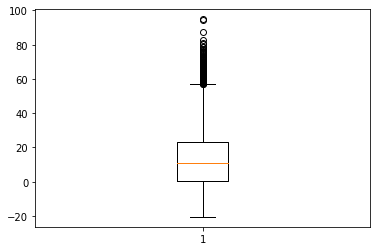

BoxPlot of var_5


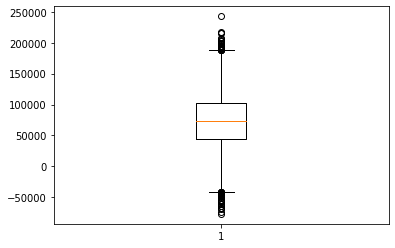

BoxPlot of var_6


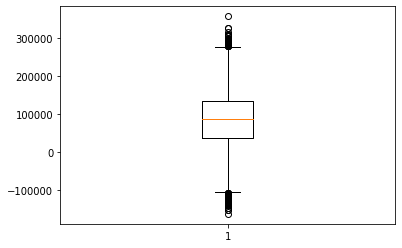

BoxPlot of var_7


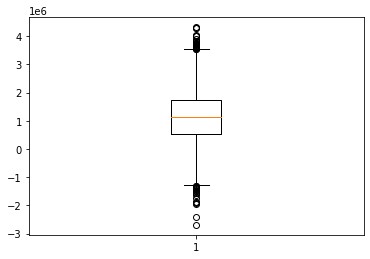

BoxPlot of var_2


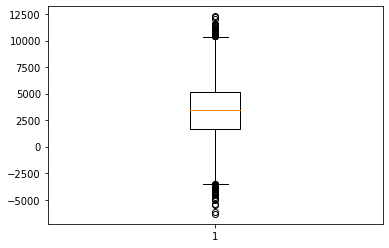

BoxPlot of var_4


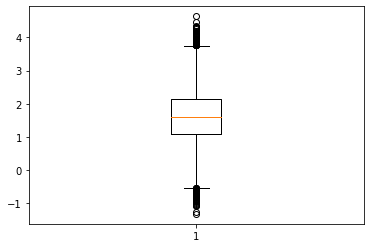

BoxPlot of var_1


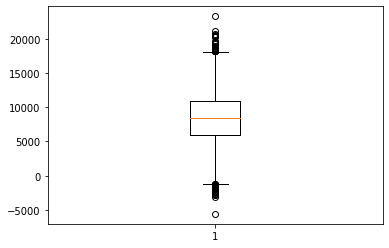

BoxPlot of var_3


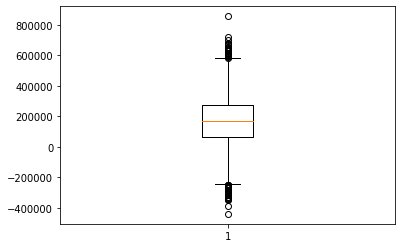

BoxPlot of var_9


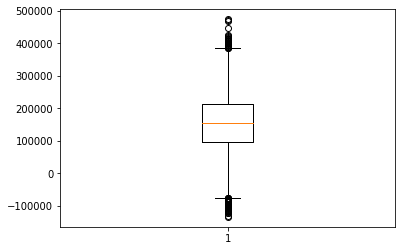

BoxPlot of var_8


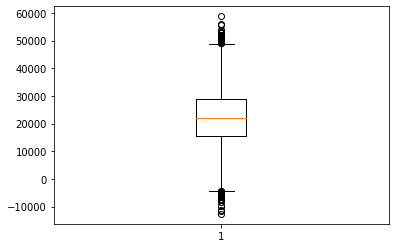

In [8]:
# Below code is to explore teh dataset and get an idea about the outliers in the dataset
for feature in Num_Features:
  plt.boxplot(data[feature])
  print("BoxPlot of {}".format(feature))
  plt.show()

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the 10 discriptive features is actually relevant for understanding Target variable. 

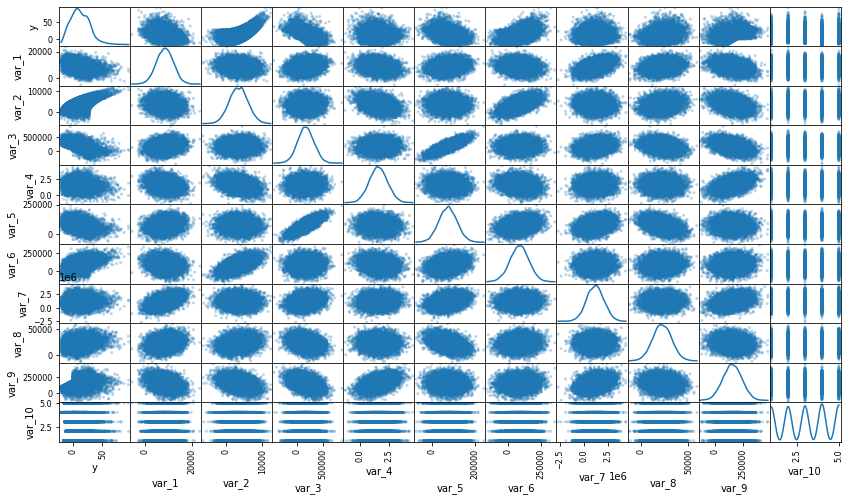

In [9]:
# Produced a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [10]:
# Below code gives the correlation between discriptive features

corr_matrix = data.loc[:,Num_Features].corr()
print(corr_matrix)

              y     var_5     var_6  ...     var_3     var_9     var_8
y      1.000000 -0.401891  0.429807  ... -0.596058  0.379986  0.194788
var_5 -0.401891  1.000000  0.277714  ...  0.808120 -0.054084 -0.413344
var_6  0.429807  0.277714  1.000000  ...  0.040761  0.097726  0.103821
var_7  0.029095  0.303735  0.046405  ...  0.225848  0.305034 -0.011027
var_2  0.497815 -0.035389  0.602046  ...  0.033808 -0.370873  0.208451
var_4 -0.045849 -0.075834 -0.188209  ...  0.036211  0.474635 -0.039344
var_1 -0.336184  0.191826 -0.169298  ...  0.196789 -0.342938  0.212547
var_3 -0.596058  0.808120  0.040761  ...  1.000000 -0.409241 -0.283731
var_9  0.379986 -0.054084  0.097726  ... -0.409241  1.000000 -0.146210
var_8  0.194788 -0.413344  0.103821  ... -0.283731 -0.146210  1.000000

[10 rows x 10 columns]


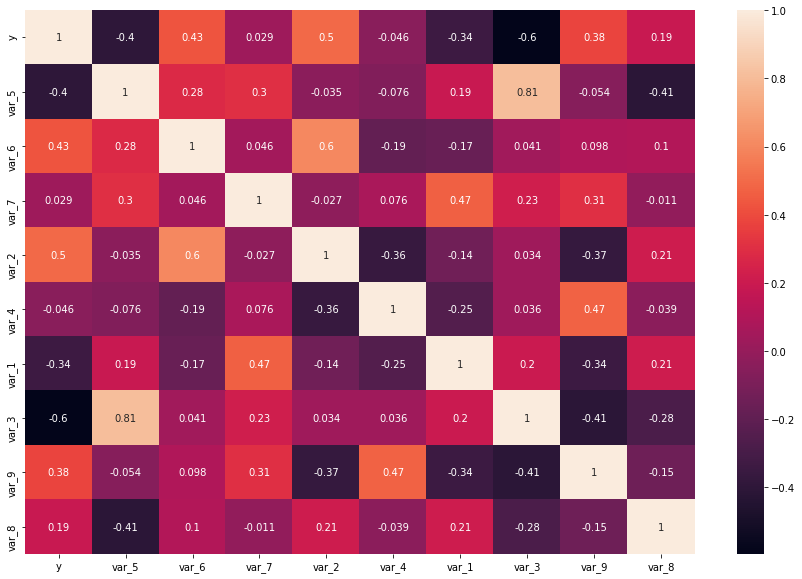

In [11]:
#Using heatmap to visualize the correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sn.heatmap(corr_matrix, annot=True)

In [12]:
# The code gives Mutual Information between discriptive feature and target feature
MI =feature_selection.mutual_info_regression(data.drop('y',axis=1),data['y'])
columns = data.drop('y',axis=1).columns
print("Mutual Information between each discriptive feature and Y as follows\n")
for i in range(len(columns)):
  print(columns[i]," vs Y :",MI[i])

Mutual Information between each discriptive feature and Y as follows

var_1  vs Y : 0.057032123761762143
var_2  vs Y : 0.5032875403666397
var_3  vs Y : 0.31519099790807026
var_4  vs Y : 0.006180729972517618
var_5  vs Y : 0.11542198372078527
var_6  vs Y : 0.12204607677401302
var_7  vs Y : 0.016207583185638086
var_8  vs Y : 0.032993014590559255
var_9  vs Y : 0.23131898825442487
var_10  vs Y : 0.08312740600921398


##Data Preprocessing

Outlier Handling

While outlier detection and handling I have detected the data points which are outside three standard deviations from mean are considered as outliers and replaced these values with lower and upper threshold values

In [13]:
# finding outliers and handling outliers
for feature in Num_Features :
    mean  = data[feature].mean()
    std = data[feature].std()
    lower = mean - 3*std
    upper = mean + 3*std
    d = data.shape[0]
    for i in  range(d):
        if data[feature][i] < lower  :
          #  print(data[feature][i],i,feature)
           data[feature][i] = lower
        elif data[feature][i] > upper :
            #  print(data[feature][i],i,feature)
             data[feature][i] = upper

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


I have done normalization using MinMaxScaler to have uniform data

In [16]:
# This code is used to normalizze the data
scaler = MinMaxScaler() 
normalized_DF = data.copy()
numerical = Num_Features
normalized_DF[numerical] = scaler.fit_transform(data[numerical])
display(normalized_DF.head(n = 5))

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
0,0.983163,0.351200,0.804727,0.164409,0.316759,0.451577,0.727256,0.739025,0.596431,0.907022,4
1,0.967686,0.200984,0.760810,0.159416,0.691246,0.402307,0.842030,0.618529,0.668843,0.950416,5
2,0.919439,0.376864,0.707220,0.178752,0.711705,0.354516,0.800195,0.673720,0.643237,0.925711,2
3,0.701726,0.716231,0.619247,0.000000,0.340327,0.188936,0.704236,0.641245,0.824029,0.846520,4
4,0.658385,0.319503,0.500430,0.168944,1.000000,0.359619,0.831995,0.646075,0.590359,1.000000,3


In [17]:
# This code is used to create dummies for categorical variable
var_10df = pd.get_dummies(data['var_10'],prefix='var_10')
var_10df

,var_10_1,var_10_2,var_10_3,var_10_4,var_10_5
0,0,0,0,1,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
9995,1,0,0,0,0
9996,0,0,0,1,0
9997,1,0,0,0,0
9998,0,0,0,1,0


In [18]:
# dummie columns are added to the data

col = var_10df.columns
for column in col:
  normalized_DF[column] = var_10df[column]

In [19]:
normalized_DF.head()

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_10_1,var_10_2,var_10_3,var_10_4,var_10_5
0,0.983163,0.351200,0.804727,0.164409,0.316759,0.451577,0.727256,0.739025,0.596431,0.907022,4,0,0,0,1,0
1,0.967686,0.200984,0.760810,0.159416,0.691246,0.402307,0.842030,0.618529,0.668843,0.950416,5,0,0,0,0,1
2,0.919439,0.376864,0.707220,0.178752,0.711705,0.354516,0.800195,0.673720,0.643237,0.925711,2,0,1,0,0,0
3,0.701726,0.716231,0.619247,0.000000,0.340327,0.188936,0.704236,0.641245,0.824029,0.846520,4,0,0,0,1,0
4,0.658385,0.319503,0.500430,0.168944,1.000000,0.359619,0.831995,0.646075,0.590359,1.000000,3,0,0,1,0,0


In [20]:
# FInal preprocesed data
Final_df = normalized_DF.drop('var_10',axis=1)
Final_df.head()

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10_1,var_10_2,var_10_3,var_10_4,var_10_5
0,0.983163,0.351200,0.804727,0.164409,0.316759,0.451577,0.727256,0.739025,0.596431,0.907022,0,0,0,1,0
1,0.967686,0.200984,0.760810,0.159416,0.691246,0.402307,0.842030,0.618529,0.668843,0.950416,0,0,0,0,1
2,0.919439,0.376864,0.707220,0.178752,0.711705,0.354516,0.800195,0.673720,0.643237,0.925711,0,1,0,0,0
3,0.701726,0.716231,0.619247,0.000000,0.340327,0.188936,0.704236,0.641245,0.824029,0.846520,0,0,0,1,0
4,0.658385,0.319503,0.500430,0.168944,1.000000,0.359619,0.831995,0.646075,0.590359,1.000000,0,0,1,0,0


In [21]:
Final_df.to_csv('BHG_Preprocessed_dataset.csv')